<a href="https://colab.research.google.com/github/Dennis-LCLema/Sustainable-Tourism-Sring2025/blob/main/Bus_Electrification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Listed below are all the libraries you
# will need for this assignment. Run this
# code chunk everytime you open this file.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import io

In [64]:
# Fixed Parameters
#Simulation
num_simulations = 100  # Number of Simulations
num_years = 20    # Number of Years in each Simulation
minimum_daily_cruise_passengers = 5000
maximum_daily_cruise_passengers = 15000
minimum_daily_independent_tourist = 100
maximum_daily_independent_tourists = 1000
electric_bus_capacity = 80   # number of passengers an electric bus can carry comfortably.

#Bus parameters.
electric_bus_value = 825000           #average price of a new electric bus.
charging_equipment = 75000            #average cost of a new charging equipment that can charge 5 buses.
installation_cost = 30000             #average cost of installing a charging equipment.
cruise_passenger_transport = 0.375      #percentage of cruise passengers that use public transport.
independent_tourist_transport = 0.25    #percentage of independent passengers that use public transport.
buses_served_per_station = 5           #number of buses served by each charging station.

#Operating and maintenance costs.
charger_operational_cost = (6500/12/30) #average cost of operating a charging station per day.
gas_station_operating_cost = (2000/30)     #cost of operating a gas station per day for diesel buses.
electricity_cost_per_mile = 0.28  #the cost of electricity per mile for new electric buses.
fuel_cost_per_mile = 0.59  #the cost of fuel per mile for new diesel buses.
electric_bus_maintenance_cost = 0.55 #maintenace cost of an electric bus per mile.
diesel_bus_maintenance_cost = 1.53 #maintenace cost of a diesel bus per mile.
driver_salary = 45000  # average salary of a bus driber in Juneau.

#emission reduction.
diesel_bus_CO2 = 2680   #average grams of CO2 per mile relesaed by a diesel bus.
electric_bus_CO2 = 1209  #average grams of CO2 per mile relesaed by an electric bus.
distance = 11.7    #The distance from Juneau downtown to Mendenhall glacier is 11.7 miles.

#initialize lists for outputs.
initial_cost_of_electrifying_list = []  # Use a list to store intial cost of electrifying
electric_maintenance_and_operating_cost_list = []  # Use a list to store maintenance and operating costs
diesel_maintenance_and_operating_cost_list = []  # Use a list to store maintenance and operating costs
total_emission_reduction_list = []  # Use a list to store total emission reductions
total_savings_list = []  # Use a list to store total savings
total_electric_bus_CO2_list = []  # Use a list to store total CO2 emissions from electric buses
total_diesel_bus_CO2_list = []  # Use a list to store total CO2 emissions from diesel buses

#Monte Carlo simulation loop.
for number_of_simulations in range (num_simulations):

  #initialize list for yearly calculations.
  yearly_emission_reduction = []
  yearly_electric_maintenance_and_operation_cost = []
  yearly_diesel_maintenance_and_operation_cost = []
  yearly_saving = []
  yearly_electric_bus_CO2 = []
  yearly_diesel_bus_CO2 = []

  for year in range (num_years):
    #initialize list for daily calculations.
    daily_emission_reduction = [] # This should remain a list to append values later
    daily_electric_maintenance_and_operation_cost = [] # This should remain a list to append values later
    daily_diesel_maintenance_and_operation_cost = [] # This should remain a list to append values later
    daily_saving = [] # This should remain a list to append values later
    daily_electric_bus_CO2 = [] # This should remain a list to append values later
    daily_diesel_bus_CO2 = [] # This should remain a list to append values later
    season_length = np.random.randint(120, 151)

    for days in range (season_length):
        # ✅ **normal distribution for cruise passengers**
        average_daily_cruise_passengers = int((maximum_daily_cruise_passengers + minimum_daily_cruise_passengers) / 2)
        daily_cruise_mu = average_daily_cruise_passengers
        optimal_daily_cruise_passengers = int((maximum_daily_cruise_passengers - average_daily_cruise_passengers) / 3) # within 3 standard deviations
        cruise_passengers = np.random.normal(loc=average_daily_cruise_passengers, scale=optimal_daily_cruise_passengers)

         # ✅ **normal distribution for independent tourists**
        average_daily_independent_tourists = int((maximum_daily_independent_tourists + minimum_daily_independent_tourist) / 2)
        daily_ind_mu = average_daily_independent_tourists
        optimal_daily_independent_tourists = int((maximum_daily_independent_tourists - average_daily_independent_tourists) / 3) # within 3 standard deviations
        independent_tourists = np.random.normal(loc=average_daily_independent_tourists, scale=optimal_daily_independent_tourists)

        #proportion of daily passengers that use public transport.
        cruise_passenger_public = cruise_passengers * cruise_passenger_transport
        independent_tourist_public = independent_tourists * independent_tourist_transport
        daily_public = int(cruise_passenger_public + independent_tourist_public)

        #number of buses  and stations needed.
        number_of_buses = int(daily_public) / electric_bus_capacity
        number_of_charging_stations_needed = int(number_of_buses / buses_served_per_station)

        #operation and maintenance cost of electric bus.
        daily_operation_cost = number_of_buses * electricity_cost_per_mile * distance
        daily_maintenance_cost = number_of_buses * electric_bus_maintenance_cost
        daily_maintenance_and_operation_cost_electric_value = charger_operational_cost + daily_operation_cost + daily_maintenance_cost

        #operation and maintenance cost of diesel bus.
        daily_diesel_bus_maintenance_cost = number_of_buses * diesel_bus_maintenance_cost
        daily_operation_cost = number_of_buses * fuel_cost_per_mile * distance
        daily_maintenance_and_operation_cost_diesel_value = daily_diesel_bus_maintenance_cost + daily_operation_cost + gas_station_operating_cost

        #savings made on maintenance and operating.
        daily_saving_value = daily_maintenance_and_operation_cost_diesel_value - daily_maintenance_and_operation_cost_electric_value # Calculate the value and assign to a new variable

        #emission values of electric and diesel bus.
        daily_electric_bus_CO2_value = number_of_buses * electric_bus_CO2 * distance * 2 #distance to and from Mendenhall Glacier.
        daily_diesel_bus_CO2_value = number_of_buses * diesel_bus_CO2 * distance * 2 #distance to and from Mendenhall Glacier.
        daily_emission_reduction_value = daily_diesel_bus_CO2_value - daily_electric_bus_CO2_value # Calculate the value and assign to a new variable

                #append daily outputs to lists.
        daily_electric_maintenance_and_operation_cost.append(daily_maintenance_and_operation_cost_electric_value)#append calculated value to the list.
        daily_diesel_maintenance_and_operation_cost.append(daily_maintenance_and_operation_cost_diesel_value)#append calculated value to the list.
        daily_emission_reduction.append(daily_emission_reduction_value) # Append the calculated value to the list.
        daily_saving.append(daily_saving_value) # Append the calculated value to the list.
        daily_electric_bus_CO2.append(daily_electric_bus_CO2_value) # Append the calculated value to the list.
        daily_diesel_bus_CO2.append(daily_diesel_bus_CO2_value) # Append the calculated value to the list.

      # Create the DataFrame for daily values outside the inner loop
    day_df = pd.DataFrame({
        'Day': range(1, season_length + 1),
        'Electric Bus Maintenance and Operation Cost': daily_maintenance_and_operation_cost_electric_value,
        'Diesel Bus Maintenance and Operation Cost': daily_maintenance_and_operation_cost_diesel_value,
        'Emission Reduction': daily_emission_reduction_value,
        'Savings': daily_saving,
        'Electric Bus CO2': daily_electric_bus_CO2,
        'Diesel Bus CO2': daily_diesel_bus_CO2
    })

    #append yearly outputs to lists.
    yearly_electric_maintenance_and_operation_cost.append(sum(daily_electric_maintenance_and_operation_cost))
    yearly_diesel_maintenance_and_operation_cost.append(sum(daily_diesel_maintenance_and_operation_cost))
    yearly_emission_reduction.append(sum(daily_emission_reduction))
    yearly_saving.append(sum(daily_saving))
    yearly_electric_bus_CO2.append(sum(daily_electric_bus_CO2))
    yearly_diesel_bus_CO2.append(sum(daily_diesel_bus_CO2))


    #Create a dataframe for the current year.
  year_df = pd.DataFrame({
      'Year': np.arange(1, num_years + 1),
      'Electric_Maintenance and Operation Cost': yearly_electric_maintenance_and_operation_cost,
      'Diesel Bus Maintenance and Operation Cost': yearly_diesel_maintenance_and_operation_cost,
      'Savings': yearly_saving,
      'Emission Reduction': yearly_emission_reduction,
      'Electric Bus CO2': yearly_electric_bus_CO2,
      'Diesel Bus CO2': yearly_diesel_bus_CO2
      })

    # Reset daily lists for the next year
  daily_emission_reduction = []
  daily_maintenance_and_operation_cost = []
  daily_saving = []
  daily_electric_bus_CO2 = []
  daily_diesel_bus_CO2 = []

  #initial cost of electrifying is calculated once every simulation.
  initial_cost_of_electrifying = (electric_bus_value*number_of_buses) + (charging_equipment*number_of_charging_stations_needed) + (installation_cost*number_of_charging_stations_needed)


  #append simulation outputs to lists.
  electric_maintenance_and_operating_cost_list.append(sum(yearly_electric_maintenance_and_operation_cost))
  diesel_maintenance_and_operating_cost_list.append(sum(yearly_diesel_maintenance_and_operation_cost))
  total_emission_reduction_list.append(sum(yearly_emission_reduction))
  total_savings_list.append(sum(yearly_saving))
  total_electric_bus_CO2_list.append(sum(yearly_electric_bus_CO2))
  total_diesel_bus_CO2_list.append(sum(yearly_diesel_bus_CO2))
  initial_cost_of_electrifying_list.append(initial_cost_of_electrifying)

#Create a dataframe for simulation values.
simulation_df = pd.DataFrame({
    'Simulation': range(1, num_simulations + 1),
    'Initial Cost of Electrifying': initial_cost_of_electrifying_list,
    'Electric Bus Maintenance and Operating Cost': electric_maintenance_and_operating_cost_list,
    'Diesel Bus Maintenance and Operating Cost': diesel_maintenance_and_operating_cost_list,
    'Total Savings': total_savings_list,
    'Total Emission Reduction': total_emission_reduction_list,
    'Total Electric Bus CO2': total_electric_bus_CO2_list,
    'Total Diesel Bus CO2': total_diesel_bus_CO2_list
})

# Print the simulation results
simulation_df.describe()

,Simulation,Initial Cost of Electrifying,Electric Bus Maintenance and Operating Cost,Diesel Bus Maintenance and Operating Cost,Total Savings,Total Emission Reduction,Total Electric Bus CO2,Total Diesel Bus CO2
count,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,50.500000,4.057742e+07,550492.837725,1.285901e+06,735408.585637,4.514062e+09,3.710062e+09,8.224125e+09
std,29.011492,5.461795e+06,8047.437098,1.873954e+04,10692.834604,6.635920e+07,5.453995e+07,1.208992e+08
min,1.000000,2.581312e+07,532652.744203,1.244542e+06,711804.525690,4.365877e+09,3.588270e+09,7.954146e+09
25%,25.750000,3.726117e+07,546046.890040,1.275576e+06,729558.542064,4.477242e+09,3.679800e+09,8.157043e+09
50%,50.500000,4.063781e+07,550317.062749,1.285333e+06,735088.273401,4.512858e+09,3.709072e+09,8.221930e+09
75%,75.250000,4.399125e+07,555739.047992,1.297969e+06,742226.110262,4.558306e+09,3.746426e+09,8.304732e+09
max,100.000000,5.573250e+07,574273.924742,1.341305e+06,767031.490796,4.709954e+09,3.871063e+09,8.581017e+09


In [65]:
year_df.describe()

,Year,Electric_Maintenance and Operation Cost,Diesel Bus Maintenance and Operation Cost,Savings,Emission Reduction,Electric Bus CO2,Diesel Bus CO2
count,20.00000,20.000000,20.000000,20.000000,2.000000e+01,2.000000e+01,2.000000e+01
mean,10.50000,28519.148416,66608.248783,38089.100367,2.339180e+08,1.922548e+08,4.261728e+08
std,5.91608,2209.953053,5142.366373,2932.540944,1.824468e+07,1.499511e+07,3.323979e+07
min,1.00000,24086.920642,56315.081487,32228.160846,1.972101e+08,1.620850e+08,3.592951e+08
25%,5.75000,26912.756685,62845.876634,35933.119949,2.208059e+08,1.814781e+08,4.022840e+08
50%,10.50000,29105.126692,67980.430512,38875.303821,2.387025e+08,1.961872e+08,4.348897e+08
75%,15.25000,30374.922063,70969.106103,40590.322980,2.489488e+08,2.046085e+08,4.535573e+08
max,20.00000,31107.679183,72595.839925,41488.160742,2.555006e+08,2.099933e+08,4.654939e+08


In [66]:
day_df.describe()

,Day,Electric Bus Maintenance and Operation Cost,Diesel Bus Maintenance and Operation Cost,Emission Reduction,Savings,Electric Bus CO2,Diesel Bus CO2
count,143.00000,1.430000e+02,1.430000e+02,1.430000e+02,143.000000,1.430000e+02,1.430000e+02
mean,72.00000,1.770259e+02,4.170578e+02,1.430209e+06,271.898790,1.371162e+06,3.039465e+06
std,41.42463,5.704322e-14,5.133890e-13,3.738385e-09,35.341571,2.170250e+05,4.810811e+05
min,1.00000,1.770259e+02,4.170578e+02,1.430209e+06,177.088824,7.889541e+05,1.748881e+06
25%,36.50000,1.770259e+02,4.170578e+02,1.430209e+06,245.473980,1.208893e+06,2.679762e+06
50%,72.00000,1.770259e+02,4.170578e+02,1.430209e+06,272.223374,1.373155e+06,3.043884e+06
75%,107.50000,1.770259e+02,4.170578e+02,1.430209e+06,289.989117,1.482251e+06,3.285717e+06
max,143.00000,1.770259e+02,4.170578e+02,1.430209e+06,387.225611,2.079359e+06,4.609332e+06


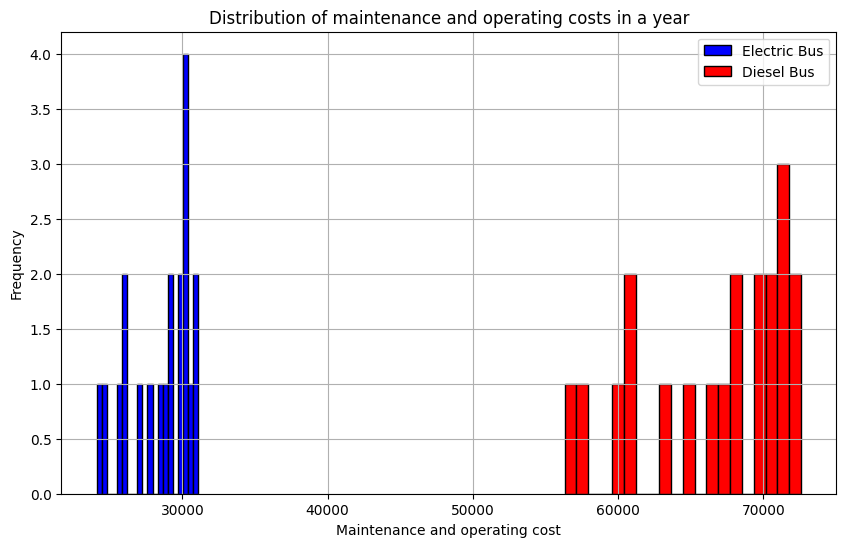

In [67]:
plt.figure(figsize=(10, 6))
plt.hist(year_df['Electric_Maintenance and Operation Cost'], bins=20, color='blue', edgecolor='black', label = 'Electric Bus') # Changed column name to match year_df
plt.hist(year_df['Diesel Bus Maintenance and Operation Cost'], bins=20, color='red', edgecolor='black', label = 'Diesel Bus')
plt.xlabel('Maintenance and operating cost')
plt.ylabel('Frequency')
plt.title('Distribution of maintenance and operating costs in a year')
plt.legend()
plt.grid(True)
plt.show()

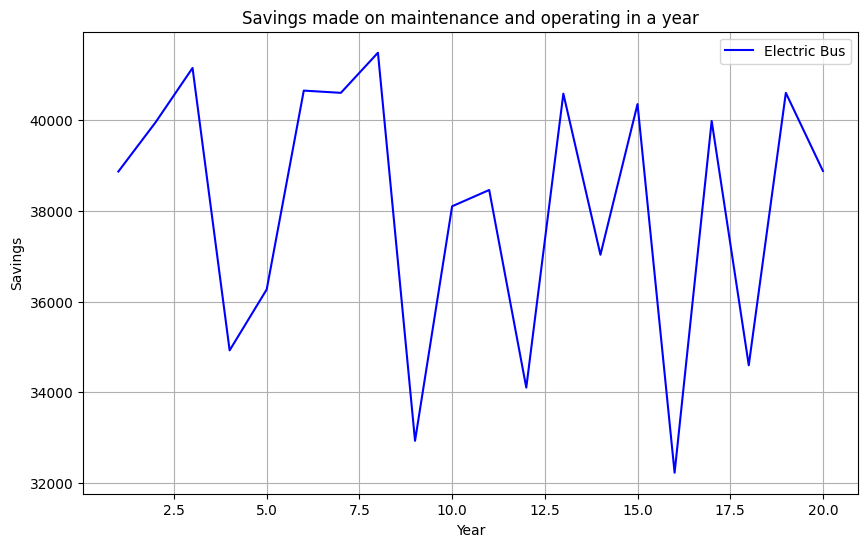

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(year_df['Year'], year_df['Savings'], label='Electric Bus', color='blue')
plt.xlabel('Year')
plt.ylabel('Savings')
plt.title('Savings made on maintenance and operating in a year')
plt.legend()
plt.grid(True)
plt.show()

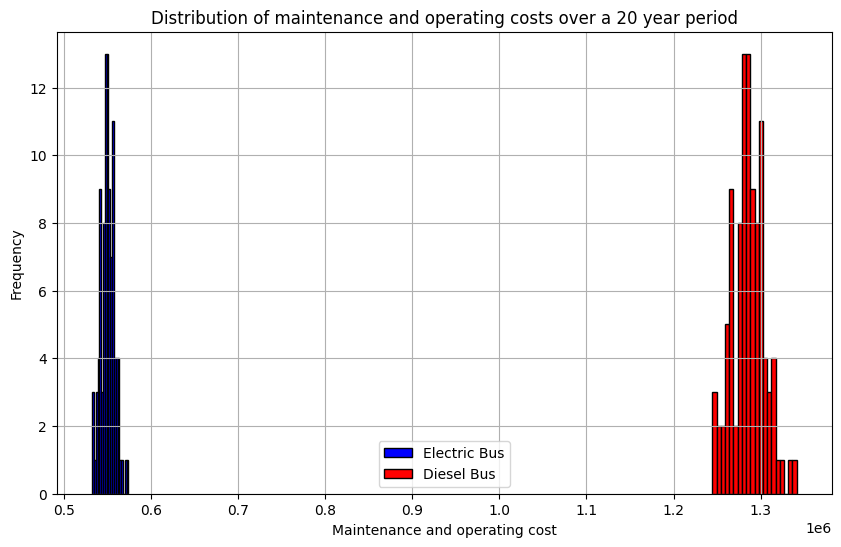

In [69]:
plt.figure(figsize=(10, 6))
plt.hist(simulation_df['Electric Bus Maintenance and Operating Cost'], bins=20, color='blue', edgecolor='black', label = 'Electric Bus')
plt.hist(simulation_df['Diesel Bus Maintenance and Operating Cost'], bins=20, color='red', edgecolor='black', label = 'Diesel Bus')
plt.xlabel('Maintenance and operating cost')
plt.ylabel('Frequency')
plt.title('Distribution of maintenance and operating costs over a 20 year period')
plt.legend()
plt.grid(True)
plt.show()

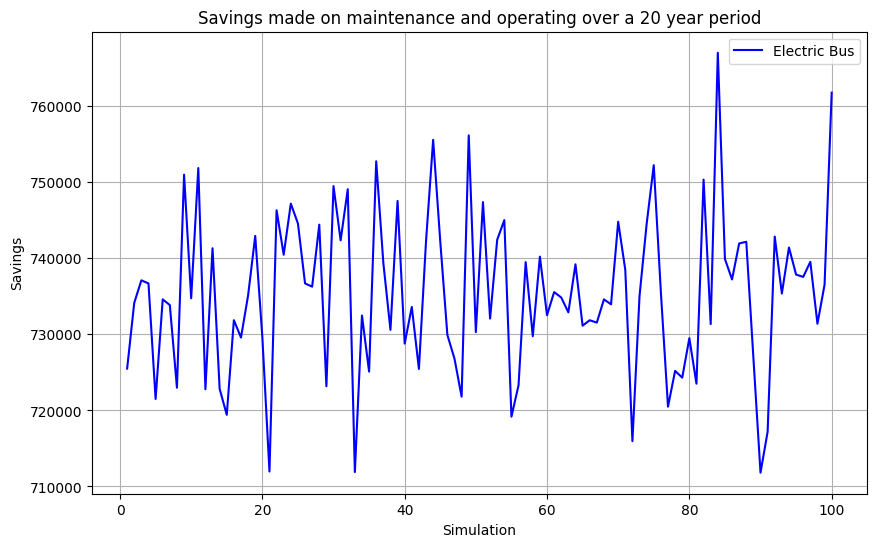

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(simulation_df['Simulation'], simulation_df['Total Savings'], label='Electric Bus', color='blue')
plt.xlabel('Simulation')
plt.ylabel('Savings')
plt.title('Savings made on maintenance and operating over a 20 year period')
plt.legend()
plt.grid(True)
plt.show()

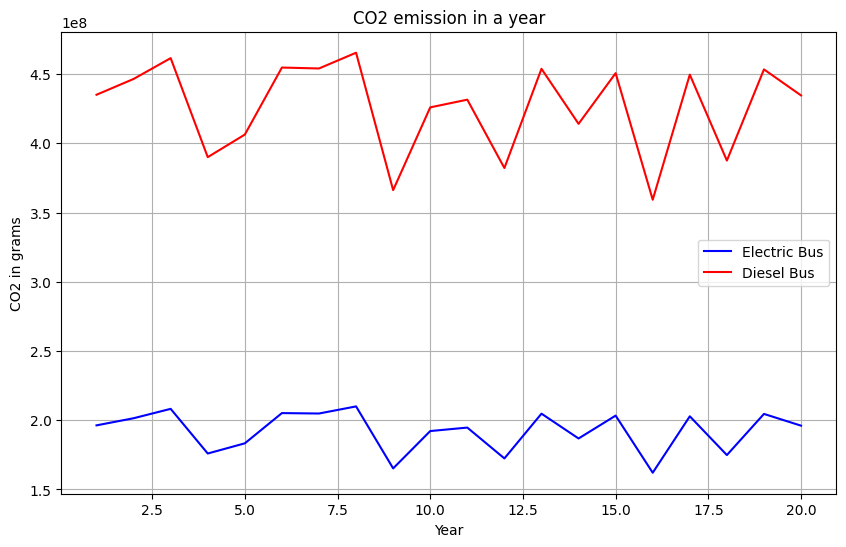

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(year_df['Year'], year_df['Electric Bus CO2'], label='Electric Bus', color='blue')
plt.plot(year_df['Year'], year_df['Diesel Bus CO2'], label='Diesel Bus', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 in grams')
plt.title('CO2 emission in a year')
plt.legend()
plt.grid(True)
plt.show()

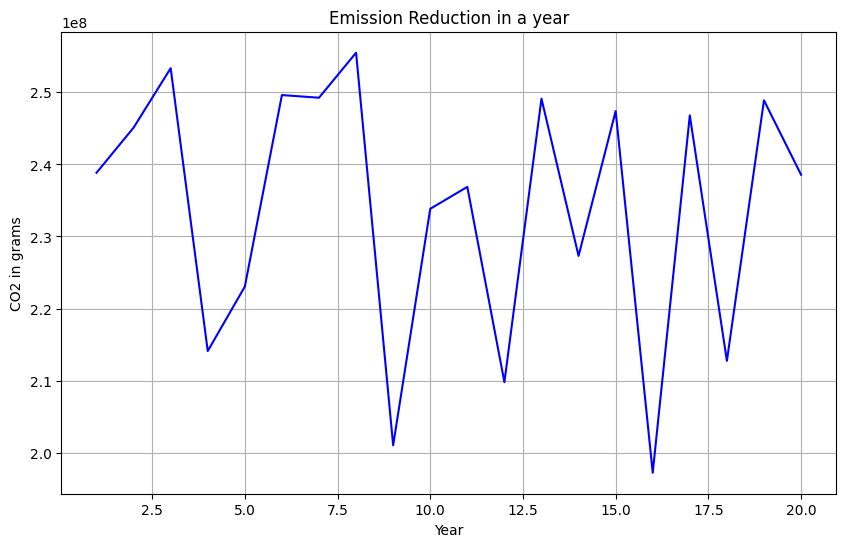

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(year_df['Year'], year_df['Emission Reduction'], color='blue')
plt.xlabel('Year')
plt.ylabel('CO2 in grams')
plt.title('Emission Reduction in a year')
plt.grid(True)
plt.show()

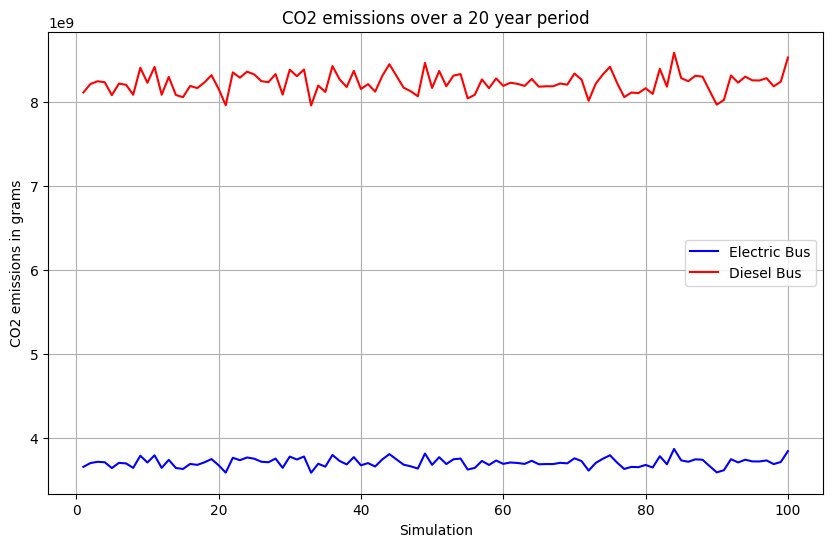

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(simulation_df['Simulation'], simulation_df['Total Electric Bus CO2'], label='Electric Bus', color='blue')
plt.plot(simulation_df['Simulation'], simulation_df['Total Diesel Bus CO2'], label='Diesel Bus', color='red')
plt.xlabel('Simulation')
plt.ylabel('CO2 emissions in grams')
plt.title('CO2 emissions over a 20 year period')
plt.legend()
plt.grid(True)
plt.show()

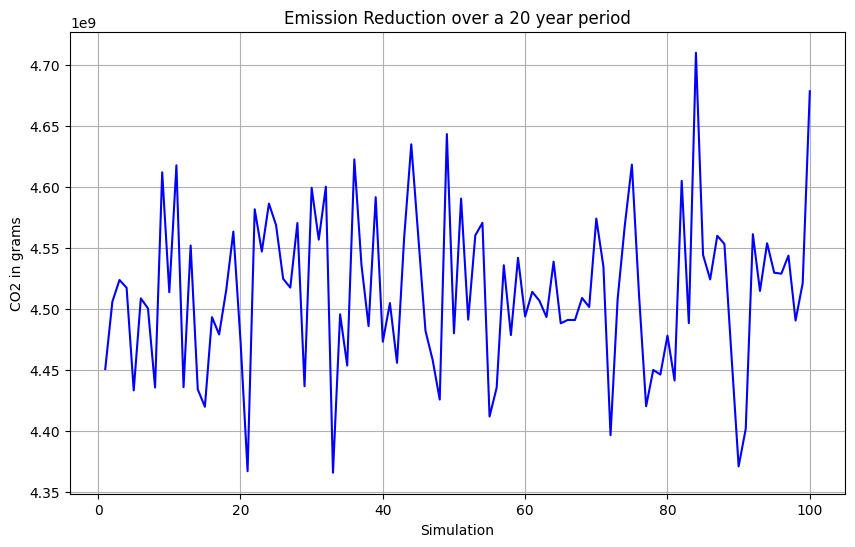

In [74]:
plt.figure(figsize=(10, 6))
plt.plot(simulation_df['Simulation'], simulation_df['Total Emission Reduction'], color='blue')
plt.xlabel('Simulation')
plt.ylabel('CO2 in grams')
plt.title('Emission Reduction over a 20 year period')
plt.grid(True)
plt.show()